# Detectando objetos com YOLO v4 - implementação com OpenCV

## Etapa 1 - Importando as bibliotecas

In [1]:
import cv2
print(cv2.__version__)

4.1.2


In [2]:
!pip install opencv-python==4.4.0.40

     |████████████████████████████████| 49.4MB 76kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30


In [1]:
import cv2
import numpy as np
import time
import os
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import zipfile
print(cv2.__version__)

4.4.0


## Etapa 2 - Conectando com o Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/yolo')

Drive already mounted at /content/yolo; to attempt to forcibly remount, call drive.mount("/content/yolo", force_remount=True).


## Etapa 3 - Carregando os arquivos do modelo treinado

In [3]:
path = '/content/yolo/My Drive/yolo/modelo_YOLOv4.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [4]:
labels_path = os.path.sep.join(['/content/cfg', 'coco.names'])
labels_path

'/content/cfg/coco.names'

In [5]:
# O strip() é como o trim() em que corta espaços antes e depois 

LABELS = open(labels_path).read().strip().split('\n')
print(LABELS)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [6]:
len(LABELS)

80

In [7]:
weights_path = os.path.sep.join(['/content', 'yolov4.weights'])
config_path = os.path.sep.join(['/content/cfg', 'yolov4.cfg'])
weights_path, config_path

('/content/yolov4.weights', '/content/cfg/yolov4.cfg')

In [10]:
# Instancia a rede neural com o CV2.dnn 
# passando o caminho do arquivo de configuração e os pesos

net = cv2.dnn.readNet(config_path,weights_path)

In [ ]:
net = cv2.dnn.readNet(config_path, weights_path)

In [9]:
net

<dnn_Net 0x7f8989ba3750>

## Etapa 4 - Definindo mais configurações para a detecção 

In [11]:
# Este comando cria uma matriz da qtd de labels x 3, com cores aleatórias
# Estas cores definidas (em BGR sempre) serão as cores das bound-box

COLORS = np.random.randint(0, 255, size=(len(LABELS), 3), dtype='uint8')
print(COLORS)

[[ 57 141 205]
 [102 149 192]
 [224  31  30]
 [172 251 135]
 [201 233  55]
 [180 250  63]
 [222 128 246]
 [138 163 153]
 [161 132  83]
 [246 189 243]
 [252  36  85]
 [ 52 167 138]
 [ 38 228 177]
 [ 82  57  40]
 [113 221 177]
 [ 30 183   0]
 [129  24 226]
 [ 83  22  22]
 [163  38  81]
 [233  39  47]
 [230 185 232]
 [190 142 157]
 [145 206  53]
 [ 74 227 187]
 [115  32  24]
 [ 51  58 104]
 [248 164   2]
 [ 48  60 104]
 [ 43  61  92]
 [200 119 175]
 [ 92  75 218]
 [214   1 165]
 [169 166 108]
 [ 82  16  63]
 [216 134 146]
 [ 48 169 162]
 [120 182 157]
 [159  51  98]
 [ 82 141 253]
 [222 167 187]
 [245 193 187]
 [122 215  52]
 [114 207 177]
 [158  90 138]
 [220  59  15]
 [  2 132 161]
 [ 65 189  69]
 [ 57 169  88]
 [204 111 144]
 [ 52  16 247]
 [167  85 202]
 [ 51  63  80]
 [213  48 216]
 [ 77 118 126]
 [ 51  45 126]
 [ 84 202 155]
 [197  43  30]
 [ 81 219 131]
 [ 38  58 184]
 [ 41 110  26]
 [141 142  30]
 [142 126  88]
 [  5  54 243]
 [208 168 197]
 [214  85 142]
 [185 254   4]
 [ 40 193 

In [13]:
ln = net.getLayerNames()
print('Lista de todas as {} camadas do YoloV4:'.format(str(len(ln))))
print(ln)


Lista de todas as 379 camadas do YoloV4: 
['conv_0', 'bn_0', 'mish_1', 'conv_1', 'bn_1', 'mish_2', 'conv_2', 'bn_2', 'mish_3', 'identity_3', 'conv_4', 'bn_4', 'mish_5', 'conv_5', 'bn_5', 'mish_6', 'conv_6', 'bn_6', 'mish_7', 'shortcut_7', 'conv_8', 'bn_8', 'mish_9', 'concat_9', 'conv_10', 'bn_10', 'mish_11', 'conv_11', 'bn_11', 'mish_12', 'conv_12', 'bn_12', 'mish_13', 'identity_13', 'conv_14', 'bn_14', 'mish_15', 'conv_15', 'bn_15', 'mish_16', 'conv_16', 'bn_16', 'mish_17', 'shortcut_17', 'conv_18', 'bn_18', 'mish_19', 'conv_19', 'bn_19', 'mish_20', 'shortcut_20', 'conv_21', 'bn_21', 'mish_22', 'concat_22', 'conv_23', 'bn_23', 'mish_24', 'conv_24', 'bn_24', 'mish_25', 'conv_25', 'bn_25', 'mish_26', 'identity_26', 'conv_27', 'bn_27', 'mish_28', 'conv_28', 'bn_28', 'mish_29', 'conv_29', 'bn_29', 'mish_30', 'shortcut_30', 'conv_31', 'bn_31', 'mish_32', 'conv_32', 'bn_32', 'mish_33', 'shortcut_33', 'conv_34', 'bn_34', 'mish_35', 'conv_35', 'bn_35', 'mish_36', 'shortcut_36', 'conv_37', 'bn

In [15]:
print('Camadas de saída: ')

# Em DN as camadas não conectadas são as camadas de saída
# Na arquitetura YOLO, há 3 camadas de saída, uma para cada tipo de imagem.
print(net.getUnconnectedOutLayers())
print(net.getUnconnectedOutLayersNames())

#print('Camadas de saída')
#print(net.getUnconnectedOutLayers())

Camadas de saída: 
[[327]
 [353]
 [379]]
['yolo_139', 'yolo_150', 'yolo_161']


In [16]:
ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]
ln

['yolo_139', 'yolo_150', 'yolo_161']

## Etapa 5 - Carregando a imagem onde será feita a detecção

In [17]:
def mostrar(img):
  fig = plt.gcf()
  fig.set_size_inches(16,10)
  plt.axis('off')
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

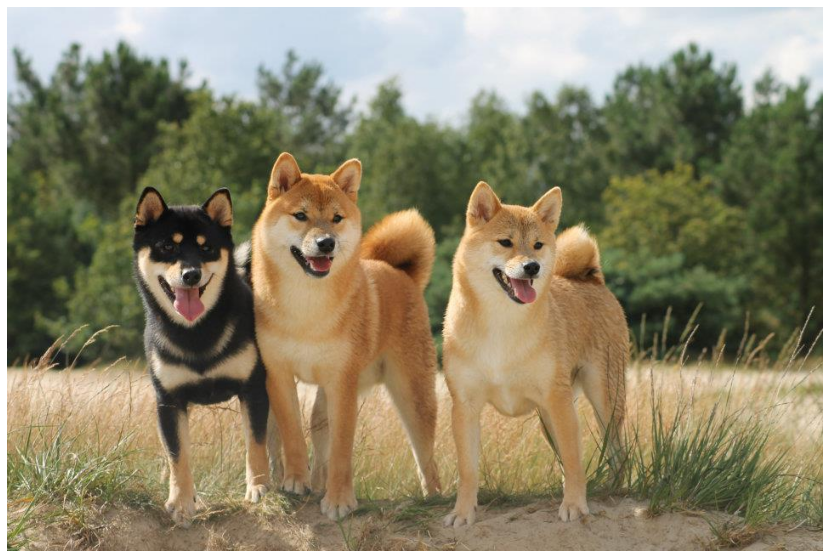

In [19]:
imagem = cv2.imread('/content/yolo/My Drive/yolo/imagens/cachorros.jpg')
mostrar(imagem)

In [20]:
type(imagem)

numpy.ndarray

In [21]:
print(imagem)

[[[240 232 225]
  [240 232 225]
  [240 232 225]
  ...
  [230 227 222]
  [230 227 222]
  [230 227 222]]

 [[240 232 225]
  [240 232 225]
  [240 232 225]
  ...
  [231 228 223]
  [231 228 223]
  [231 228 223]]

 [[240 232 225]
  [240 232 225]
  [240 232 225]
  ...
  [232 229 224]
  [232 229 224]
  [232 229 224]]

 ...

 [[104 138 131]
  [ 80 114 107]
  [ 69 106  98]
  ...
  [111 132 147]
  [105 126 141]
  [ 89 110 125]]

 [[114 148 141]
  [117 151 144]
  [108 145 135]
  ...
  [124 147 163]
  [125 148 164]
  [123 146 162]]

 [[ 49  83  76]
  [ 67 102  92]
  [ 67 104  94]
  ...
  [ 73  96 112]
  [ 68  91 107]
  [ 73  96 112]]]


In [22]:
imagem_cp = imagem.copy()

In [23]:
# Indicará o tamanho da imagem com altura x largura x canais
imagem.shape

(640, 960, 3)

In [26]:
# Pegaremos só altura x largura

(H, W) = imagem.shape[:2]
print('Altura: ' + str(H) + '\nLargura: ' + str(W))

Altura: 640
Largura: 960


## Etapa 6 - Processando a imagem de entrada

In [27]:
inicio = time.time()

# Para vc trabalhar com o CV2 a imagem precisa estar em BLOB
# O blob é uma imagem que foi trabalhada e será fornecida a RN com um pré-processamento normalmente de 2 tarefas:
# 1) Subtração média: usada para resolver variação de iluminação na imagem, senão seria ruim para RN Convolucional
# 2) Redimensionamento - Colocar a imagem no tamanho aceito por aquela rede.
# No Yolo é 416 x 416 ou 608 x 608
# Em uma nova tecnologia, tem que verificar quais são os tamanhos aceitos por aquela rede


# O 1/255 indica a normalização que faremos dos dados, ou fator de escala
# O (416,416) é o tamanho final da imagem que redimensionaremos
# O como o padrão é RGB, mas Yolo usa BGR, o swapRB inverte um pelo outro
# O crop indica se parte da imagem poderá ser cortada no redimensionamento
blob = cv2.dnn.blobFromImage(imagem, 1/255.0, (416,416), swapRB=True, crop = False)

# alimentaremos a rede com o blob
net.setInput(blob)

# Jogará as imagens inputadas no item anterior para os neurônios de saída ['yolo_139', 'yolo_150', 'yolo_161'] alimentados no ln
layer_outputs = net.forward(ln)


termino = time.time()
print('YOLO levou {:.2f} segundos'.format(termino-inicio))

"""
inicio = time.time()

blob = cv2.dnn.blobFromImage(imagem, 1 / 255.0, (416, 416), swapRB = True, crop = False)
net.setInput(blob)
layer_outputs = net.forward(ln)

termino = time.time()
print('YOLO levou {:.2f} segundos'.format(termino - inicio))

"""

YOLO levou 2.32 segundos


"\ninicio = time.time()\n\nblob = cv2.dnn.blobFromImage(imagem, 1 / 255.0, (416, 416), swapRB = True, crop = False)\nnet.setInput(blob)\nlayer_outputs = net.forward(ln)\n\ntermino = time.time()\nprint('YOLO levou {:.2f} segundos'.format(termino - inicio))\n\n"

## Etapa 7 - Definindo as variáveis

In [28]:

#Nível de confiança do ajuste
threshold = 0.5
# Non-maximun supression
# Como a maoria das células não conterá um objeto, obtêm valor de Pc que removerá caixas com baixa probabilidade de conter um objeto e também área compartilhada
# O padrão é 0.3
threshold_NMS = 0.3

# Lista de caixas
caixas= []

confiancas = []
IDclasses = []

"""
threshold = 0.5
threshold_NMS = 0.3
caixas = []
confiancas = []
IDclasses = []

"""

'\nthreshold = 0.5\nthreshold_NMS = 0.3\ncaixas = []\nconfiancas = []\nIDclasses = []\n\n'

## Etapa 8 - Realizando a predição

In [29]:
len(layer_outputs)

#len(layer_outputs)

3

In [31]:
# Indicam a primeira escala de previsão
layer_outputs[0]

array([[0.0110055 , 0.01021747, 0.02264759, ..., 0.        , 0.        ,
        0.        ],
       [0.01492388, 0.01543289, 0.03303423, ..., 0.        , 0.        ,
        0.        ],
       [0.01701082, 0.01489798, 0.05110354, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9912933 , 0.99049157, 0.02108764, ..., 0.        , 0.        ,
        0.        ],
       [0.98667467, 0.98426443, 0.03099855, ..., 0.        , 0.        ,
        0.        ],
       [0.9830682 , 0.985908  , 0.05975068, ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [32]:
# Indicam a segunda escala de previsão
layer_outputs[1]

array([[0.03031933, 0.03208476, 0.10433296, ..., 0.        , 0.        ,
        0.        ],
       [0.03298577, 0.03253514, 0.13059245, ..., 0.        , 0.        ,
        0.        ],
       [0.0312387 , 0.03151366, 0.15157257, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.96770096, 0.96682906, 0.06866273, ..., 0.        , 0.        ,
        0.        ],
       [0.96435654, 0.96775067, 0.09513652, ..., 0.        , 0.        ,
        0.        ],
       [0.96610314, 0.9677124 , 0.10772247, ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [33]:
# Indicam a terceira escala de previsão
layer_outputs[2]

array([[0.0640237 , 0.06951442, 0.15857814, ..., 0.        , 0.        ,
        0.        ],
       [0.06164717, 0.05672135, 0.31426722, ..., 0.        , 0.        ,
        0.        ],
       [0.03240779, 0.05009161, 0.7458891 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.93245447, 0.9313108 , 0.20663446, ..., 0.        , 0.        ,
        0.        ],
       [0.9336966 , 0.93029344, 0.29772264, ..., 0.        , 0.        ,
        0.        ],
       [0.95123345, 0.95295554, 0.52080923, ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [30]:
layer_outputs[0], len(layer_outputs[0])

(array([[0.0110055 , 0.01021747, 0.02264759, ..., 0.        , 0.        ,
         0.        ],
        [0.01492388, 0.01543289, 0.03303423, ..., 0.        , 0.        ,
         0.        ],
        [0.01701082, 0.01489798, 0.05110354, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.9912933 , 0.99049157, 0.02108764, ..., 0.        , 0.        ,
         0.        ],
        [0.98667467, 0.98426443, 0.03099855, ..., 0.        , 0.        ,
         0.        ],
        [0.9830682 , 0.985908  , 0.05975068, ..., 0.        , 0.        ,
         0.        ]], dtype=float32), 8112)

In [ ]:
layer_outputs[2], 



# A partir do 5º elemento, indica para aquele elemento da saída 2 a probabilidade de pertencer a cada classe
# Os 5 primeiros valores são:
# Pc (probabilidade de existir um objeto), Bx e By (onde começam as caixas delimitadoras)
# Bh e Bw que são altura e largura das caixas
# + 80 classes do coco
layer_outputs[2][0], 


# Indica o Total de registros
# 5 que são Pc (probabilidade de existir um objeto), Bx e By (onde começam as caixas delimitadoras)
# Bh e Bw que são altura e largura das caixas
# + 80 classes do coco
len(layer_outputs[2][0])

(array([[0.0640237 , 0.06951442, 0.15857814, ..., 0.        , 0.        ,
         0.        ],
        [0.06164717, 0.05672135, 0.31426722, ..., 0.        , 0.        ,
         0.        ],
        [0.03240779, 0.05009161, 0.7458891 , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.93245447, 0.9313108 , 0.20663446, ..., 0.        , 0.        ,
         0.        ],
        [0.9336966 , 0.93029344, 0.29772264, ..., 0.        , 0.        ,
         0.        ],
        [0.95123345, 0.95295554, 0.52080923, ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 array([6.4023696e-02, 6.9514424e-02, 1.5857814e-01, 3.4840125e-01,
        4.2169032e-07, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0

In [34]:
print(LABELS)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [35]:
LABELS[16]

'dog'

In [36]:
np.argmax(np.array([0.10, 0.80, 0.10]))

1

In [38]:
teste = np.array([0.10, 0.80, 0.10])

In [39]:
teste[1]

0.8

In [43]:

# Este for correrá cada camada de saída, cada uma das 3
for output in layer_outputs:
  # Este correrá cada detecção
  for detection in output:
    # Acessaremos a partir da 5º posição que é onde temos a probabilidade de um objeto pertencer a uma classe
    scores = detection[5:]

     # Agora precisamos saber para cada registro qual é a classe com maior probabilidade de ser
     # O argmax retorna o índice do registro de maior valor  
    classeId = np.argmax(scores)

    # Sabemos qual é a classe com maior probabilidade, o próximo passo é saber sua confiança para julgar se ela atinge o threshold mínimo
    confianca = scores[classeId]

    if confianca > threshold:
      print('scores: {}'.format(str(scores)))
      print('Classe mais provável: ' + str(classeId))
      print('Confiança: '+ str(confianca))
      print('Rótulo: ' + str(LABELS[classeId]))

      # Agora vamos aplicar as caixas delimitadoras para na sequência aplicar o threshold
      caixa = detection[0:4] * np.array([W,H,W,H])
      (centerX, centerY, width, height) = caixa.astype('int')

      x = int(centerX - (width/2))
      y = int(centerY - (height / 2))

      caixas.append([x,y, int(width), int(height)])
      confiancas.append(float(confianca))
      IDclasses.append(classeId)
"""
for output in layer_outputs:
  for detection in output:
    scores = detection[5:]
    classeID = np.argmax(scores)
    confianca = scores[classeID]
    if confianca > threshold:
      print('scores: ' + str(scores))
      print('classe mais provável: ' + str(classeID))
      print('confiança: ' + str(confianca))

      caixa = detection[0:4] * np.array([W, H, W, H])
      (centerX, centerY, width, height) = caixa.astype('int')

      x = int(centerX - (width / 2))
      y = int(centerY - (height / 2))

      caixas.append([x, y, int(width), int(height)])
      confiancas.append(float(confianca))
      IDclasses.append(classeID)


"""

scores: [0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.605953 0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.      ]
Classe mais provável: 16
Confiança: 0.605953
Rótulo: dog
scores: [0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.9570455 0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.     

"\nfor output in layer_outputs:\n  for detection in output:\n    scores = detection[5:]\n    classeID = np.argmax(scores)\n    confianca = scores[classeID]\n    if confianca > threshold:\n      print('scores: ' + str(scores))\n      print('classe mais provável: ' + str(classeID))\n      print('confiança: ' + str(confianca))\n\n      caixa = detection[0:4] * np.array([W, H, W, H])\n      (centerX, centerY, width, height) = caixa.astype('int')\n\n      x = int(centerX - (width / 2))\n      y = int(centerY - (height / 2))\n\n      caixas.append([x, y, int(width), int(height)])\n      confiancas.append(float(confianca))\n      IDclasses.append(classeID)\n\n\n"

In [ ]:
# Lista dos boundbox criados
print(caixas), len(caixas)

[[145, 200, 186, 380], [275, 165, 235, 438], [141, 205, 189, 397], [274, 195, 235, 405], [495, 207, 237, 402], [497, 216, 235, 411], [279, 174, 230, 417], [280, 173, 228, 420], [134, 204, 169, 401], [137, 204, 164, 401], [142, 210, 179, 389], [142, 208, 178, 391], [277, 196, 234, 402], [277, 193, 234, 408], [502, 208, 231, 404], [504, 207, 230, 406]]


(None, 16)

In [44]:
print(confiancas), len(confiancas)

[0.6059529781341553, 0.9570454955101013, 0.88912433385849, 0.9090498089790344, 0.9525655508041382, 0.7894678115844727, 0.9860403537750244, 0.9869317412376404, 0.6623730659484863, 0.6959574222564697, 0.9729036688804626, 0.9767158627510071, 0.8875227570533752, 0.897688627243042, 0.9810121655464172, 0.9824252128601074]


(None, 16)

In [45]:
print(IDclasses), len(IDclasses)

[16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]


(None, 16)

## Etapa 9 - Aplicando a Non-Maxima Suppression

In [46]:
# O openCV já tem um método pronto para realizar o NMS
# Ele selecionará as melhores caixas/boundboxes
objs = cv2.dnn.NMSBoxes(caixas, confiancas, threshold, threshold_NMS)

In [48]:
objs

array([[ 7],
       [15],
       [11]], dtype=int32)

In [49]:
print(objs.flatten())

[ 7 15 11]


In [50]:
confiancas[7], confiancas[15], confiancas[11]

(0.9869317412376404, 0.9824252128601074, 0.9767158627510071)

In [ ]:
confiancas[0]

0.6059529781341553

## Etapa 10 - Mostrando o resultado da detecção na imagem

In [56]:
# Aqui recortaremos da foto original os valores que foram encontrados pelo OpenCV

def mostrar_objetos_preditos(objs):
  if len(objs) > 0:
    # flatten transforma de matrix para vetor
    for i in objs.flatten():
      # Aqui buscaremos os pontos de começo das caixas
      (x, y) = (caixas[i][0], caixas[i][1])
      # Aqui buscaremos largura e altura das caixas
      (w, h) = (caixas[i][2], caixas[i][3])

      # alimenta a variável objeto com os valores
      objeto = imagem_cp[y:y + h, x:x + w]
      cv2_imshow(objeto)

      cor = [int(c) for c in COLORS[IDclasses[i]]]

      # Aqui desenhamos a caixa
      cv2.rectangle(imagem, (x, y), (x + w, y + h), cor, 2)
      # Colocaremos os objetos
      texto = "{}: {:.4f}".format(LABELS[IDclasses[i]], confiancas[i])
      cv2.putText(imagem, texto, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, cor, 2)

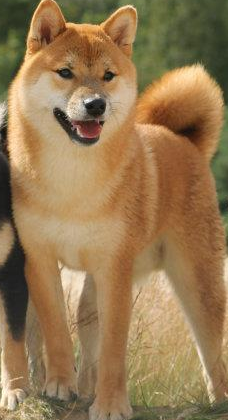

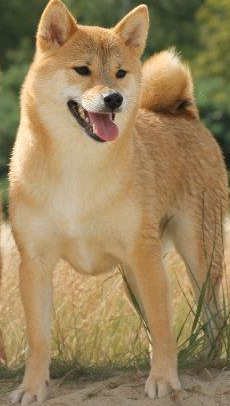

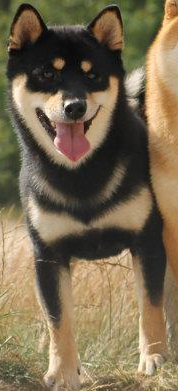

In [57]:
mostrar_objetos_preditos(objs)

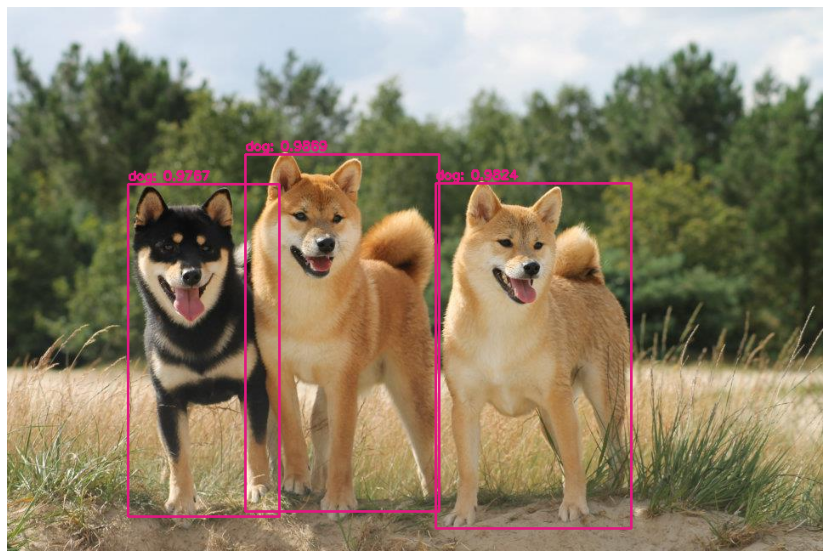

In [52]:
mostrar(imagem)

In [54]:
cv2.imwrite('resultado.jpg', imagem)

True

In [55]:
!cp ./resultado.jpg /content/yolo/My\ Drive/yolo/imagens/resultado_cachorro.jpg